# Data Preparation
### Data Description
#### Importing Packages

Here, we import the necessary Packages

In [1]:
import pandas as pd
import numpy as np
import pennylane as pl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Adding CSV data in our project
Using pandas.read_csv(PATH) function to add csv dataset from our local system

In [3]:
accident = pd.read_csv("US_Accidents_Dec20_updated.csv",nrows=30000)

In [4]:
accident.shape

(30000, 47)

### NETWORK SAMPLING

In [5]:
# NETWORK SAMPLING
accident.head()
def Network_sampling(accident, step):

   indexes = np.arange(0, len(accident), step=step)
   Network_sample= accident.iloc[indexes]
   return Network_sample


# Obtain a systematic sample and save it in a new variable
Network_sample = Network_sampling(accident, 3)

# View sampled data frame
display(Network_sample )
#printNetwork_sample 

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.098410,-84.522410,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
6,A-2716606,2,08-02-2016 08:16,08-02-2016 14:16,39.06324,-84.03243,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
9,A-2716609,2,08-02-2016 11:51,08-02-2016 17:51,41.37531,-81.82017,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
12,A-2716612,2,08-02-2016 15:43,08-02-2016 21:43,39.19288,-84.47723,39.196150,-84.473350,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,A-2746585,2,01-07-2016 08:27,01-07-2016 14:27,32.76379,-96.93981,32.761950,-96.965220,1.482,At Macarthur Blvd/Exit 36 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
29988,A-2746588,2,01-07-2016 08:41,01-07-2016 14:41,30.38247,-95.48645,30.363030,-95.485010,1.346,At League Line Rd/Exit 91 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
29991,A-2746591,2,01-07-2016 08:59,01-07-2016 14:59,39.07633,-94.60579,39.075150,-94.611000,0.291,At Eaton St/Exit 235 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
29994,A-2746594,3,01-07-2016 09:23,01-07-2016 15:23,29.61983,-95.38725,29.603681,-95.386969,1.116,Between Almeda-Genoa Rd and Beltway 8 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df=Network_sample
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.098410,-84.522410,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
6,A-2716606,2,08-02-2016 08:16,08-02-2016 14:16,39.06324,-84.03243,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
9,A-2716609,2,08-02-2016 11:51,08-02-2016 17:51,41.37531,-81.82017,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
12,A-2716612,2,08-02-2016 15:43,08-02-2016 21:43,39.19288,-84.47723,39.196150,-84.473350,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,A-2746585,2,01-07-2016 08:27,01-07-2016 14:27,32.76379,-96.93981,32.761950,-96.965220,1.482,At Macarthur Blvd/Exit 36 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
29988,A-2746588,2,01-07-2016 08:41,01-07-2016 14:41,30.38247,-95.48645,30.363030,-95.485010,1.346,At League Line Rd/Exit 91 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
29991,A-2746591,2,01-07-2016 08:59,01-07-2016 14:59,39.07633,-94.60579,39.075150,-94.611000,0.291,At Eaton St/Exit 235 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
29994,A-2746594,3,01-07-2016 09:23,01-07-2016 15:23,29.61983,-95.38725,29.603681,-95.386969,1.116,Between Almeda-Genoa Rd and Beltway 8 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Exploratory Data Analysis 

### Drop unnecessary features.

In [7]:
df=df.drop(['ID','Start_Time','End_Time','Description','Number','Zipcode','Weather_Timestamp','Airport_Code','Country'],axis = 1)
df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,40.10891,-83.09286,40.112060,-83.031870,3.230,Outerbelt E,R,Dublin,Franklin,...,False,False,False,False,False,False,Night,Night,Night,Night
3,2,39.10148,-84.52341,39.098410,-84.522410,0.219,US-50 E,R,Cincinnati,Hamilton,...,False,False,False,False,False,False,Night,Night,Night,Day
6,2,39.06324,-84.03243,39.067310,-84.058510,1.427,State Route 32,R,Williamsburg,Clermont,...,False,False,False,False,True,False,Day,Day,Day,Day
9,2,41.37531,-81.82017,41.367860,-81.821740,0.521,I-71 S,R,Cleveland,Cuyahoga,...,False,False,False,False,False,False,Day,Day,Day,Day
12,2,39.19288,-84.47723,39.196150,-84.473350,0.307,I-75 N,R,Cincinnati,Hamilton,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,2,32.76379,-96.93981,32.761950,-96.965220,1.482,Tom Landry Fwy,R,Grand Prairie,Dallas,...,False,False,False,False,False,False,Day,Day,Day,Day
29988,2,30.38247,-95.48645,30.363030,-95.485010,1.346,I-45 S,R,Conroe,Montgomery,...,False,False,False,False,False,False,Day,Day,Day,Day
29991,2,39.07633,-94.60579,39.075150,-94.611000,0.291,I-35 S,R,Kansas City,Jackson,...,False,False,False,False,False,False,Day,Day,Day,Day
29994,3,29.61983,-95.38725,29.603681,-95.386969,1.116,S Freeway S,R,Houston,Harris,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df.count

<bound method DataFrame.count of        Severity  Start_Lat  Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0             3   40.10891  -83.09286  40.112060 -83.031870         3.230   
3             2   39.10148  -84.52341  39.098410 -84.522410         0.219   
6             2   39.06324  -84.03243  39.067310 -84.058510         1.427   
9             2   41.37531  -81.82017  41.367860 -81.821740         0.521   
12            2   39.19288  -84.47723  39.196150 -84.473350         0.307   
...         ...        ...        ...        ...        ...           ...   
29985         2   32.76379  -96.93981  32.761950 -96.965220         1.482   
29988         2   30.38247  -95.48645  30.363030 -95.485010         1.346   
29991         2   39.07633  -94.60579  39.075150 -94.611000         0.291   
29994         3   29.61983  -95.38725  29.603681 -95.386969         1.116   
29997         2   32.83648  -96.76146  32.836590 -96.761460         0.008   

                 Street Side           Cit

## Encoding 

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [9]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Street']= label_encoder.fit_transform(df['Street'])
df['Side']= label_encoder.fit_transform(df['Side'])
df['City']= label_encoder.fit_transform(df['City'])
df['County']= label_encoder.fit_transform(df['County'])
df['State']= label_encoder.fit_transform(df['State'])
df['Timezone']= label_encoder.fit_transform(df['Timezone'])
df['Wind_Direction']= label_encoder.fit_transform(df['Wind_Direction'])
df['Weather_Condition']= label_encoder.fit_transform(df['Weather_Condition'])
df['Amenity']= label_encoder.fit_transform(df['Amenity'])
df['Bump']= label_encoder.fit_transform(df['Bump'])
df['Crossing']= label_encoder.fit_transform(df['Crossing'])
df['Give_Way']= label_encoder.fit_transform(df['Give_Way'])
df['Junction']= label_encoder.fit_transform(df['Junction'])
df['No_Exit']= label_encoder.fit_transform(df['No_Exit'])
df['Railway']= label_encoder.fit_transform(df['Railway'])
df['Roundabout']= label_encoder.fit_transform(df['Roundabout'])
df['Station']= label_encoder.fit_transform(df['Station'])
df['Stop']= label_encoder.fit_transform(df['Stop'])
df['Traffic_Calming']= label_encoder.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal']= label_encoder.fit_transform(df['Traffic_Signal'])
df['Turning_Loop']= label_encoder.fit_transform(df['Turning_Loop'])
df['Sunrise_Sunset']= label_encoder.fit_transform(df['Sunrise_Sunset'])
df['Civil_Twilight']= label_encoder.fit_transform(df['Civil_Twilight'])
df['Nautical_Twilight']= label_encoder.fit_transform(df['Nautical_Twilight'])
df['Astronomical_Twilight']= label_encoder.fit_transform(df['Astronomical_Twilight'])


df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,40.10891,-83.09286,40.112060,-83.031870,3.230,1930,1,307,107,...,0,0,0,0,0,0,1,1,1,1
3,2,39.10148,-84.52341,39.098410,-84.522410,0.219,2228,1,208,120,...,0,0,0,0,0,0,1,1,1,0
6,2,39.06324,-84.03243,39.067310,-84.058510,1.427,2124,1,1153,61,...,0,0,0,0,1,0,0,0,0,0
9,2,41.37531,-81.82017,41.367860,-81.821740,0.521,1640,1,219,77,...,0,0,0,0,0,0,0,0,0,0
12,2,39.19288,-84.47723,39.196150,-84.473350,0.307,1643,1,208,120,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,2,32.76379,-96.93981,32.761950,-96.965220,1.482,2165,1,423,80,...,0,0,0,0,0,0,0,0,0,0
29988,2,30.38247,-95.48645,30.363030,-95.485010,1.346,1591,1,239,209,...,0,0,0,0,0,0,0,0,0,0
29991,2,39.07633,-94.60579,39.075150,-94.611000,0.291,1567,1,528,142,...,0,0,0,0,0,0,0,0,0,0
29994,3,29.61983,-95.38725,29.603681,-95.386969,1.116,2017,1,488,123,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.Severity

0        3
3        2
6        2
9        2
12       2
        ..
29985    2
29988    2
29991    2
29994    3
29997    2
Name: Severity, Length: 10000, dtype: int64

In [11]:
df.County

0        107
3        120
6         61
9         77
12       120
        ... 
29985     80
29988    209
29991    142
29994    123
29997     80
Name: County, Length: 10000, dtype: int32

## Missing Value Treatement

### Checking Null and missing values

In [12]:
df.isnull().sum()

Severity                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                     0
End_Lng                     0
Distance(mi)                0
Street                      0
Side                        0
City                        0
County                      0
State                       0
Timezone                    0
Temperature(F)            304
Wind_Chill(F)            8596
Humidity(%)               311
Pressure(in)              285
Visibility(mi)            312
Wind_Direction              0
Wind_Speed(mph)          1576
Precipitation(in)        9148
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Traffic_Signal              0
Turning_Lo

<AxesSubplot:>

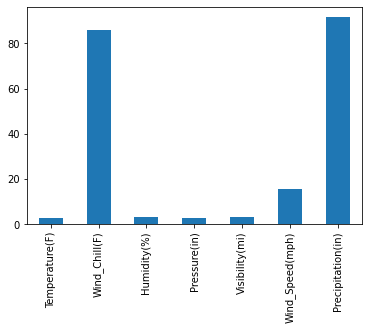

In [13]:
percentage_of_missing_values=df.isna().sum()/len(df)*100
percentage_of_missing_values[percentage_of_missing_values!=0].plot(kind="bar")

In [14]:
from matplotlib import pyplot as plt

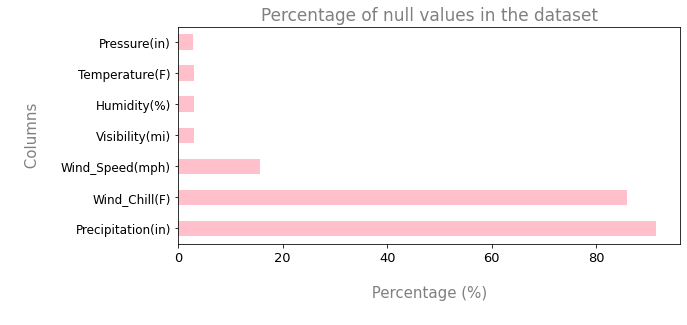

In [15]:
a = (df.isna().sum().sort_values(ascending=False)/len(df))*100
plt.figure(figsize=(9,4))
plt.title("Percentage of null values in the dataset",size=17,color="grey")
plt.xlabel('\n Percentage (%) \n', fontsize=15, color='grey')
plt.ylabel('\n Columns \n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a[a!=0].plot(kind="barh",color="pink")
plt.show()

In [16]:
df["Severity"].value_counts()

2    7384
3    1989
4     627
Name: Severity, dtype: int64

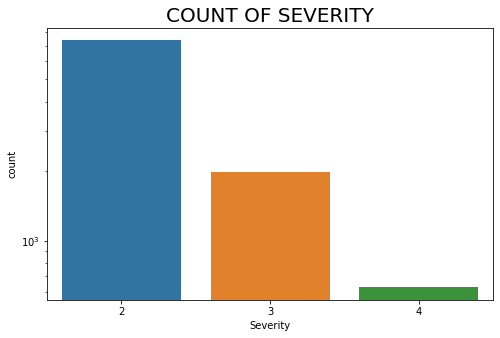

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x="Severity",data=df)
plt.yscale("log")
plt.title("COUNT OF SEVERITY",fontsize=20)
plt.show()

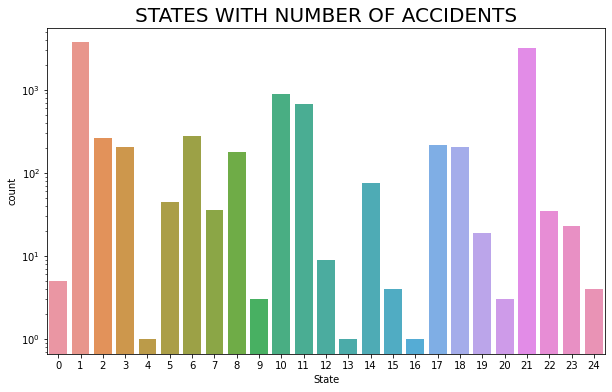

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

## KNN Imputation for missing Value

In [19]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)

In [20]:
df[['Timezone','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
'Precipitation(in)', 'Weather_Condition']]=imputer.fit_transform(df[['Timezone','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)', 'Weather_Condition']])

In [21]:
df.isnull().sum()

Severity                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Timezone                 0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
A

### Pairplot

## Feature Selection by Pearson Correlation Coefficient ( Filter method )
As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV. We will only select features which has correlation of above 0.9 (taking absolute value) with the output variable.

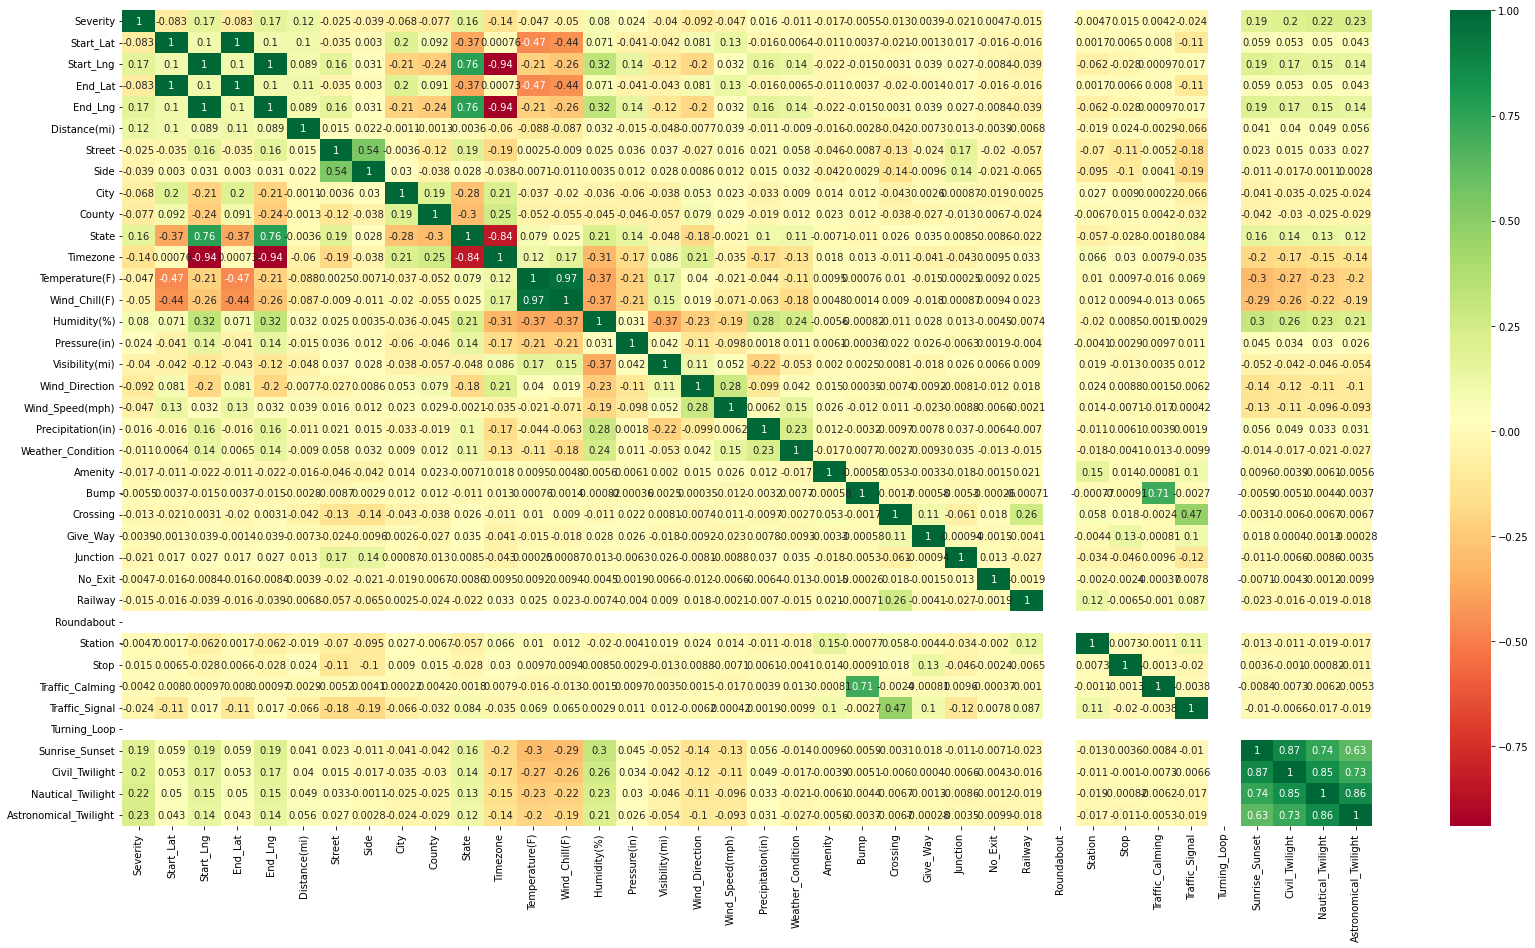

In [22]:
#correlations of each features in Data
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(28,15))
#plot heat map
#"RdYlGn"
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(df, 0.80)
len(set(corr_features))

6

In [25]:
corr_features

{'Astronomical_Twilight',
 'Civil_Twilight',
 'End_Lat',
 'End_Lng',
 'Nautical_Twilight',
 'Wind_Chill(F)'}

In [26]:
df.drop(corr_features,axis=1)

,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,Timezone,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,40.10891,-83.09286,3.230,1930,1,307,107,17,1.0,...,0,0,0,0,0,0,0,0,0,1
3,2,39.10148,-84.52341,0.219,2228,1,208,120,17,1.0,...,1,0,0,0,0,0,0,0,0,1
6,2,39.06324,-84.03243,1.427,2124,1,1153,61,17,1.0,...,0,0,0,0,0,0,0,1,0,0
9,2,41.37531,-81.82017,0.521,1640,1,219,77,17,1.0,...,1,0,0,0,0,0,0,0,0,0
12,2,39.19288,-84.47723,0.307,1643,1,208,120,17,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,2,32.76379,-96.93981,1.482,2165,1,423,80,21,0.0,...,0,0,0,0,0,0,0,0,0,0
29988,2,30.38247,-95.48645,1.346,1591,1,239,209,21,0.0,...,0,0,0,0,0,0,0,0,0,0
29991,2,39.07633,-94.60579,0.291,1567,1,528,142,11,0.0,...,1,0,0,0,0,0,0,0,0,0
29994,3,29.61983,-95.38725,1.116,2017,1,488,123,21,0.0,...,0,0,0,0,0,0,0,0,0,0


### Drop Corealation Features

In [27]:
df=df.drop(corr_features,axis=1)

In [28]:
print(df.shape)

(10000, 32)


In [29]:
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,Timezone,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.0,10000.000000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000
mean,2.324300,35.712133,-104.033979,0.695496,1571.817000,0.923100,564.995600,173.321600,10.105600,1.199200,...,0.218900,0.00070,0.005000,0.0,0.005900,0.00830,0.000200,0.068700,0.0,0.259800
std,0.586996,4.416753,12.276867,2.070231,534.729306,0.266446,296.329629,92.606615,8.664096,1.427699,...,0.413521,0.02645,0.070537,0.0,0.076588,0.09073,0.014141,0.252956,0.0,0.438547
min,2.000000,26.218240,-123.239953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
25%,2.000000,32.793439,-118.078508,0.173000,1397.000000,1.000000,292.000000,94.000000,1.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
50%,2.000000,34.077626,-96.912217,0.415000,1605.000000,1.000000,528.000000,173.000000,10.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
75%,3.000000,38.755851,-94.853072,0.687250,1981.000000,1.000000,825.000000,265.000000,21.000000,3.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,1.000000
max,4.000000,47.596987,-80.006660,150.138000,2352.000000,1.000000,1179.000000,360.000000,24.000000,4.000000,...,1.000000,1.00000,1.000000,0.0,1.000000,1.00000,1.000000,1.000000,0.0,1.000000


In [30]:
X=df

In [31]:
X

,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,Timezone,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,40.10891,-83.09286,3.230,1930,1,307,107,17,1.0,...,0,0,0,0,0,0,0,0,0,1
3,2,39.10148,-84.52341,0.219,2228,1,208,120,17,1.0,...,1,0,0,0,0,0,0,0,0,1
6,2,39.06324,-84.03243,1.427,2124,1,1153,61,17,1.0,...,0,0,0,0,0,0,0,1,0,0
9,2,41.37531,-81.82017,0.521,1640,1,219,77,17,1.0,...,1,0,0,0,0,0,0,0,0,0
12,2,39.19288,-84.47723,0.307,1643,1,208,120,17,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,2,32.76379,-96.93981,1.482,2165,1,423,80,21,0.0,...,0,0,0,0,0,0,0,0,0,0
29988,2,30.38247,-95.48645,1.346,1591,1,239,209,21,0.0,...,0,0,0,0,0,0,0,0,0,0
29991,2,39.07633,-94.60579,0.291,1567,1,528,142,11,0.0,...,1,0,0,0,0,0,0,0,0,0
29994,3,29.61983,-95.38725,1.116,2017,1,488,123,21,0.0,...,0,0,0,0,0,0,0,0,0,0


## Create Target variable

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(X)
Y = kmeans.fit_predict(X)
Y

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
pd.DataFrame(Y).value_counts()

0    7716
1    2284
dtype: int64

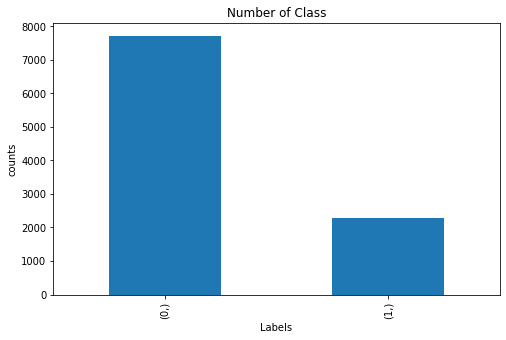

In [34]:
ax =pd.DataFrame(Y).value_counts().plot(kind='bar',figsize=(8,5),
                                title="Number of Class")
ax.set_xlabel("Labels")
ax.set_ylabel("counts")
#plt.savefig("before sampling deffect counts.jpg")
plt.show()

## Feature Scaling --> StandardScaler 
StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution.

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
X

array([[0.5       , 0.64974201, 0.9286152 , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.60261904, 0.89552612, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.60083035, 0.90688264, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.60144264, 0.66231742, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.15911082, 0.644242  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.309571  , 0.61245608, ..., 1.        , 0.        ,
        0.        ]])

## Train and Test data split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_train.shape

(7000, 32)

In [37]:
print(X_train.shape)
print(Y_train.shape)

(7000, 32)
(7000,)


## Handling imbalanced dataset

### Oversampling Method

In [38]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before OverSampling, counts of label '1': 1627
Before OverSampling, counts of label '0': 5373 



In [39]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.70)
X_train_ns,Y_train_ns=os.fit_resample(X_train,Y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [40]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train_ns == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train_ns == 0)))

Before OverSampling, counts of label '1': 3761
Before OverSampling, counts of label '0': 5373 



# Model Builing

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42,criterion='entropy',max_depth=None,  min_samples_split=6,
    min_samples_leaf=1,  min_weight_fraction_leaf=0.5, max_features='auto',  max_leaf_nodes=None,  min_impurity_decrease=0.5,
    bootstrap=True,  oob_score=False)

rf.fit( X_train_ns, Y_train_ns)
predict_rf = rf.predict(X_test)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [47]:
from sklearn.metrics import accuracy_score
existing_accuracy2 = accuracy_score(np.round(Y_test),np.round(predict_rf))
print ('Existing Accuracy2 : ',existing_accuracy2 )

Existing Accuracy2 :  0.781


## Convolutional Neural Network

In [48]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,Conv1D,Flatten,MaxPooling1D,BatchNormalization
from keras.models import Sequential
import keras
from keras import layers
from keras.models import load_model

In [49]:
%%time
model = Sequential()
model.add(Conv1D(212,(2),  activation='relu', input_shape=(32,1)))
model.add(MaxPooling1D((2), padding='same'))
model.add(BatchNormalization())

model.add(Conv1D(156,(2),  activation='relu'))
model.add(MaxPooling1D((2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.80))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())

model.summary()
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",  metrics=["accuracy"])
history = model.fit(X_train_ns, Y_train_ns, batch_size=32,epochs=10,validation_data=(X_test,Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 212)           636       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 212)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 212)          848       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 156)           66300     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 156)           0         
 1D)                                                             
                                                        

In [50]:
y_score = model.predict(X_test)

Existing_Accuracy= accuracy_score(Y_test, np.round(y_score.argmax(axis=1)))
Existing_Accuracy

94/94 [==============================] - 0s 3ms/step


0.7806666666666666

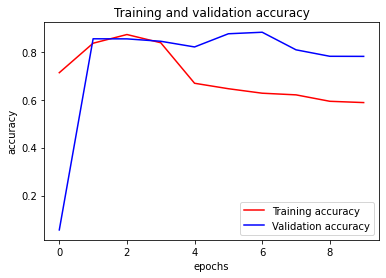

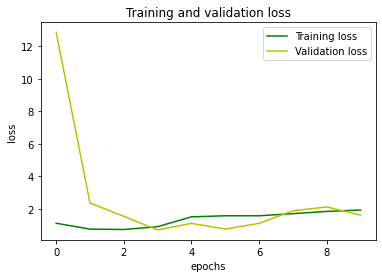

In [51]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig(' accuracy.png')
plt.show()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig(' loss.png')
plt.show()

In [52]:
Existing = model.predict(X_test)
from sklearn.metrics import accuracy_score
existing_accuracy= accuracy_score(Y_test, np.round(Existing.argmax(axis=1)))
print('Existing Accuracy ',existing_accuracy)

94/94 [==============================] - 0s 2ms/step
Existing Accuracy  0.7806666666666666


## Classification_Report

In [53]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, np.round(Existing.argmax(axis=1))))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2343
           1       0.00      0.00      0.00       657
           4       0.00      0.00      0.00         0

    accuracy                           0.78      3000
   macro avg       0.26      0.33      0.29      3000
weighted avg       0.61      0.78      0.68      3000



C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

# Proposed Model

## Quantum Convolutional Neural Network

### Creating CNN structure

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,Conv1D,Flatten,MaxPooling1D,BatchNormalization
from keras.models import Sequential
import keras
from keras import layers
from keras.models import load_model


def create_generator():
    
    CNN = Sequential()
    CNN.add(Conv1D(512,(3),  activation='relu', input_shape=(32,1)))
    CNN.add(MaxPooling1D((2), padding='same'))
    CNN.add(BatchNormalization())

    CNN.add(Conv1D(256,(3),  activation='relu'))
    CNN.add(MaxPooling1D((2), padding='same'))
    CNN.add(BatchNormalization())

    CNN.add(Dropout(0.20))
  

    CNN.add(Flatten())



    CNN.add(Dense(2))
    CNN.add(BatchNormalization())
    CNN.add(Activation('softmax'))
    
        
    return CNN

g = create_generator()
g.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 30, 512)           2048      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15, 512)          0         
 1D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 15, 512)          2048      
 hNormalization)                                                 
                                                                 
 conv1d_3 (Conv1D)           (None, 13, 256)           393472    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 7, 256)           0         
 1D)                                                             
                                                      

### Creating Quantum structure

In [55]:
N_QUBITS = 2
backend = pl.device("default.qubit", wires=N_QUBITS)

# Define classical layers
input_layer = g
#input_layer = tf.keras.layers.Dense(2)
output_layer = tf.keras.layers.Dense(2, activation="Softmax")
 
# Define a quantum circuit with two qubits
@pl.qnode(backend)
def qnode(inputs, weights):
    pl.templates.AngleEmbedding(inputs, wires=range(N_QUBITS))
    pl.templates.BasicEntanglerLayers(weights, wires=range(N_QUBITS))
    return [pl.expval(pl.PauliZ(wires=i)) for i in range(N_QUBITS)]
 
# Convert quantum circuit to keras layer
N_LAYERS = 6
weight_shapes = {"weights": (N_LAYERS, N_QUBITS)}
qlayer = pl.qnn.KerasLayer(qnode, weight_shapes, output_dim=N_QUBITS)

### QCNN

In [56]:
%%time

CNN = tf.keras.models.Sequential([input_layer, qlayer, output_layer])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)



CNN.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
fitting = CNN.fit(X_train_ns, Y_train_ns,  batch_size=64, epochs=3, validation_split=0.2, verbose=2)

CNN.save("QCNN.h5")


Epoch 1/3
115/115 - 536s - loss: 0.2511 - accuracy: 0.9257 - val_loss: 0.1808 - val_accuracy: 1.0000 - 536s/epoch - 5s/step
Epoch 2/3
115/115 - 562s - loss: 0.0797 - accuracy: 0.9878 - val_loss: 0.1038 - val_accuracy: 1.0000 - 562s/epoch - 5s/step
Epoch 3/3
115/115 - 551s - loss: 0.0445 - accuracy: 0.9926 - val_loss: 0.0416 - val_accuracy: 1.0000 - 551s/epoch - 5s/step
CPU times: total: 27min 57s
Wall time: 27min 30s


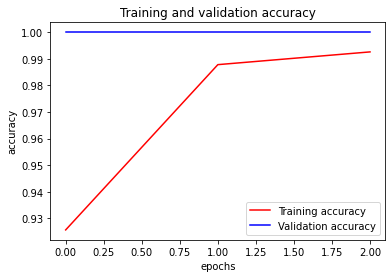

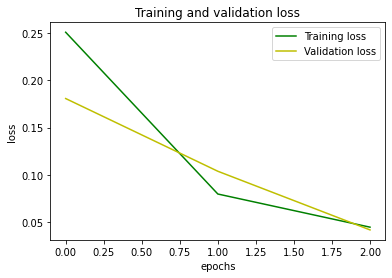

In [59]:
accuracy = fitting.history['accuracy']
val_accuracy = fitting.history['val_accuracy']
loss = fitting.history['loss']
val_loss = fitting.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig('proposed accuracy.png')
plt.show()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('proposed loss.png')
plt.show()

# BayesianOptimization Hyper tuning

In [71]:
%%time 

from sklearn.metrics import roc_auc_score
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score

def model_prediction(C):
            
    y_score = CNN.predict(X_test)
    f= accuracy_score(Y_test, np.round(y_score.argmax(axis=1)))
    
    return f

pbounds = {"C": [0.1, 10]}
optimizer = BayesianOptimization(f = model_prediction,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 111)
optimizer.maximize(init_points = 45, n_iter = 5)
print("Best Accuracy: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   |     C     |
-------------------------------------
94/94 [==============================] - 93s 987ms/step
|  1        |  0.9507   |  6.16     |
94/94 [==============================] - 93s 984ms/step
|  2        |  0.9507   |  1.774    |
94/94 [==============================] - 85s 900ms/step
|  3        |  0.9507   |  4.417    |
94/94 [==============================] - 81s 860ms/step
|  4        |  0.9507   |  7.716    |
94/94 [==============================] - 84s 894ms/step
|  5        |  0.9507   |  3.024    |
94/94 [==============================] - 81s 858ms/step
|  6        |  0.9507   |  1.577    |
94/94 [==============================] - 81s 860ms/step
|  7        |  0.9507   |  0.3225   |
94/94 [==============================] - 81s 862ms/step
|  8        |  0.9507   |  4.26     |
94/94 [==============================] - 81s 856ms/step
|  9        |  0.9507   |  2.463    |
94/94 [==============================] - 81s 862ms/step
|  10       |  0.9507 

TypeError: 'float' object is not subscriptable

In [72]:
from sklearn.metrics import accuracy_score
y_score = CNN.predict(X_test)
acc= accuracy_score(Y_test, np.round(y_score.argmax(axis=1)))
print('Proposed Accuracy ',acc)

94/94 [==============================] - 87s 921ms/step
Proposed Accuracy  0.9506666666666667


## Classification_Report

In [73]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, np.round(y_score.argmax(axis=1))))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2343
           1       0.82      1.00      0.90       657

    accuracy                           0.95      3000
   macro avg       0.91      0.97      0.93      3000
weighted avg       0.96      0.95      0.95      3000



## Comparing All Models

In [74]:
print('Proposed Accuracy ',acc)
print('Existing Accuracy ',existing_accuracy)
print('Existing Accuracy2 ',existing_accuracy2)

Proposed Accuracy  0.9506666666666667
Existing Accuracy  0.7806666666666666
Existing Accuracy2  0.781


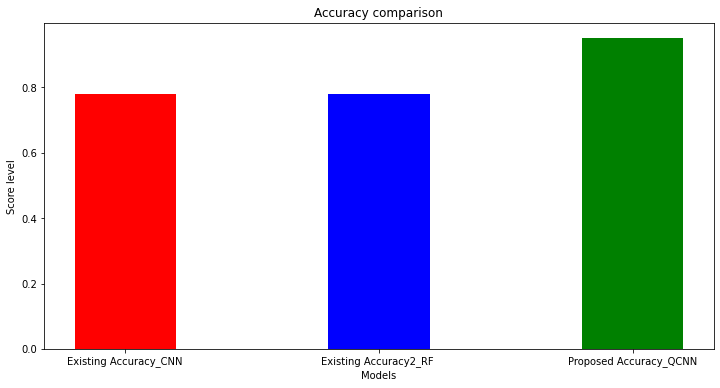

In [75]:
data = {'Existing Accuracy_CNN':existing_accuracy,'Existing Accuracy2_RF ':existing_accuracy2, 'Proposed Accuracy_QCNN':acc}

label = list(data.keys())
model = list(data.values())
color = ['red','blue','green']  
fig = plt.figure(figsize = (12, 6))
 
plt.bar(label, model, color =color,width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Score level")
plt.title("Accuracy comparison")
plt.show()

## Actual and Predicted Values

In [76]:
#Predict on test data                   
predictions = CNN.predict(X_test[:100])
predictions=np.round(predictions.argmax(axis=1))
actual=Y_test[:100]
print("Predicted values are: ", predictions)
print("Real values are: ", Y_test[:100])

4/4 [==============================] - 3s 625ms/step
Predicted values are:  [1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0]
Real values are:  [1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0]


## Actual and Predicted Graph

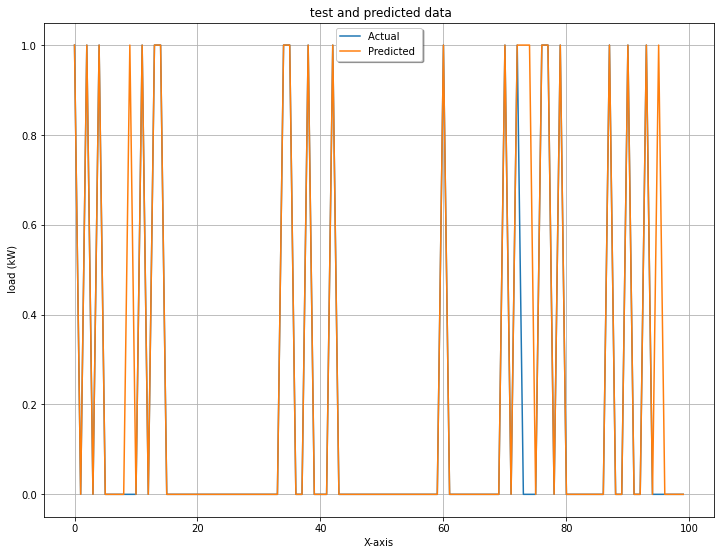

In [77]:
x_ax = range(len(actual))
plt.figure(figsize=(12,20))
plt.subplot(2,1,1)
plt.plot(x_ax, actual, label="Actual ")
plt.plot(x_ax, predictions, label="Predicted ")
plt.title(" test and predicted data")
plt.xlabel('X-axis')
plt.ylabel(' load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

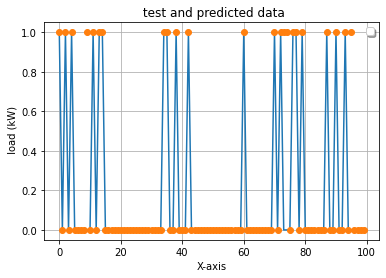

In [78]:
import matplotlib.pyplot as plt
plt.plot(actual)
plt.plot(predictions, 'o')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.title(" test and predicted data")
plt.xlabel('X-axis')
plt.ylabel(' load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.show()

94/94 [==============================] - 83s 882ms/step


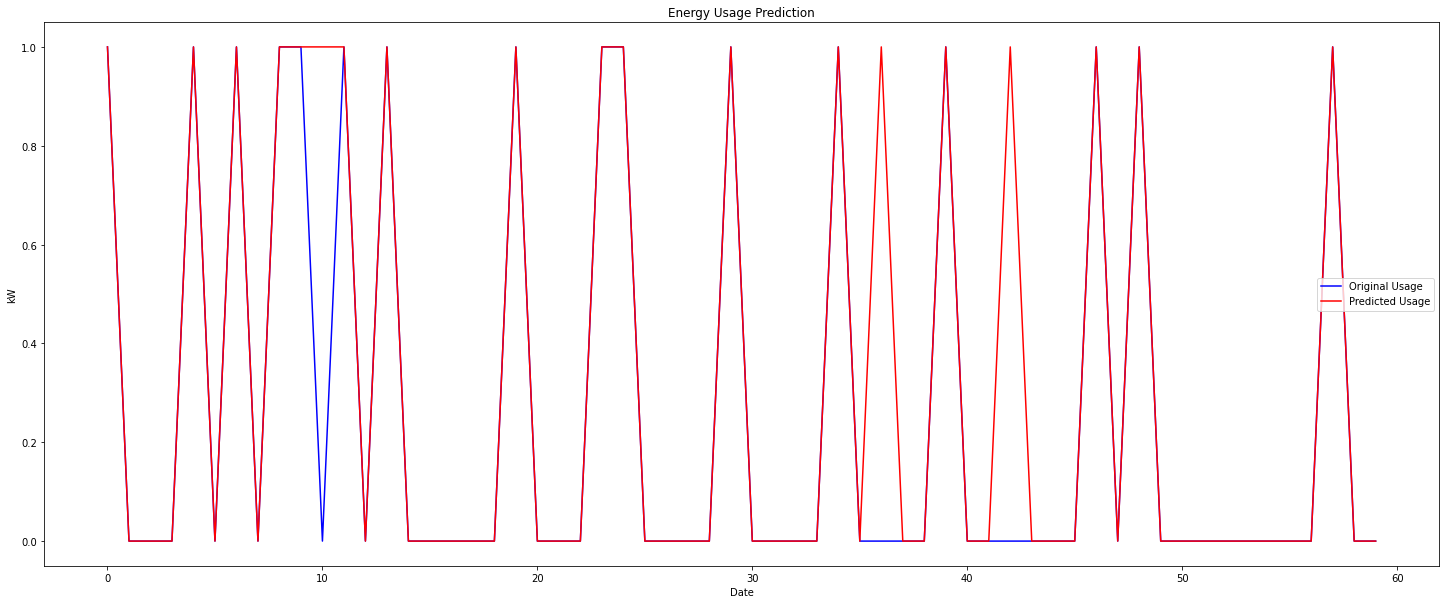

In [79]:
pre=CNN.predict(X_test)
pre=np.round(pre.argmax(axis=1))
         
       
       
plt.figure(figsize=(25,10))
plt.plot(Y_test[::50], color='blue', label='Original Usage')
plt.plot(pre[::50] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()

### Kindly Enter the values of input then output will be predicted

In [ ]:
usr_inp_Severity = float(input("Severity: "))

usr_inp_Start_Lat = float(input("Start_Lat): "))

usr_inp_Start_Lng= float(input("Start_Lng: "))

usr_inp_Distance = float(input("Distance(mi):"))

usr_inp_Street = float(input("Street: "))

usr_inp_Side = float(input("Side: "))

usr_inp_City = float(input("City: "))

usr_inp_County= float(input("County: "))

usr_inp_State= float(input("State: "))

usr_inp_Timezone = float(input("Timezone: "))


usr_inp_Temperature= float(input("Temperature(F): "))

usr_inp_Humidity = float(input("Humidity(%): "))

usr_inp_Pressure= float(input("Pressure(in): "))

usr_inp_Visibility = float(input("Visibility(mi): "))

usr_inp_Wind_Direction	 = float(input("Wind_Direction: "))

usr_inp_Wind_Speed = float(input("'Wind_Speed(mph): "))

usr_inp_Precipitation = float(input("Precipitation(in): "))

usr_inp_Weather_Condition= float(input("Weather_Condition: "))

usr_inp_Amenity= float(input("Amenity: "))

usr_inp_Bump = float(input("Bump: "))


usr_inp_Crossing= float(input("Crossing: "))

usr_inp_Give_Way = float(input("Give_Way: "))



usr_inp_Junction = float(input("Junction): "))

usr_inp_No_Exit = float(input("No_Exit: "))

usr_inp_Railway	= float(input("Railway: "))

usr_inp_Roundabout = float(input("Roundabout: "))

usr_inp_Station	 = float(input("Station: "))

usr_inp_Stop = float(input("Stop: "))

usr_inp_Traffic_Calming = float(input("Traffic_Calming: "))

usr_inp_Traffic_Signal = float(input("Traffic_Signal: "))

usr_inp_Turning_Loop = float(input("Turning_Loop: "))

usr_inp_Sunrise_Sunset = float(input("Sunrise_Sunset: "))


predicted = CNN.predict([[usr_inp_Severity,usr_inp_Start_Lat,usr_inp_Start_Lng,usr_inp_Distance,usr_inp_Street,
        usr_inp_Side,usr_inp_City,usr_inp_County,usr_inp_State,usr_inp_Timezone,usr_inp_Temperature,
        usr_inp_Humidity,usr_inp_Pressure,usr_inp_Visibility,usr_inp_Wind_Direction,usr_inp_Wind_Speed,
        usr_inp_Precipitation,usr_inp_Weather_Condition,usr_inp_Amenity,usr_inp_Bump,usr_inp_Crossing,
        usr_inp_Give_Way,usr_inp_Junction,usr_inp_No_Exit,usr_inp_Railway,usr_inp_Roundabout,
        usr_inp_Station,usr_inp_Stop,usr_inp_Traffic_Calming,usr_inp_Traffic_Signal,usr_inp_Turning_Loop,
        usr_inp_Sunrise_Sunset ]])

predicted=np.round(predicted.argmax(axis=1))
print("Traffic__predicted", predicted)